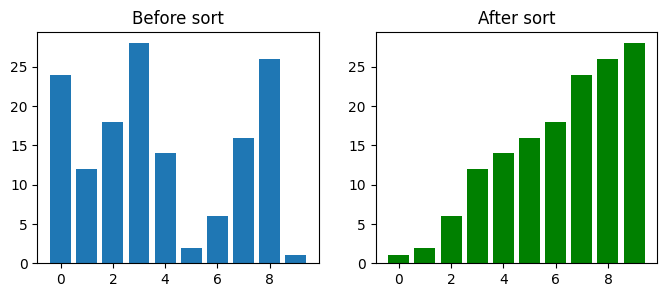

In [1]:
import random, time, heapq, matplotlib.pyplot as plt, pandas as pd, numpy as np

# Problem 1
def selection_sort(a):
    arr=list(a) 
    n=len(arr)
    for i in range(n):
        min_idx=i
        for j in range(i+1,n):
            if arr[j]<arr[min_idx]:
                min_idx=j
        arr[i],arr[min_idx]=arr[min_idx],arr[i]
    return arr

def merge_sort(a):
    if len(a)<=1:return a
    m=len(a)//2
    l=merge_sort(a[:m])
    r=merge_sort(a[m:])
    i=j=0;res=[]
    while i<len(l)and j<len(r):
        if l[i]<r[j]:
            res.append(l[i]);i+=1
        else:
            res.append(r[j]);j+=1
    res.extend(l[i:]);res.extend(r[j:])
    return res

def heap_sort(a):
    arr=list(a)
    heapq.heapify(arr)
    return [heapq.heappop(arr)for _ in range(len(arr))]

def quick_sort_random(a):
    if len(a)<=1:return a
    p=random.choice(a)
    l=[x for x in a if x<p]
    e=[x for x in a if x==p]
    g=[x for x in a if x>p]
    return quick_sort_random(l)+e+quick_sort_random(g)

def quick_sort_median3(a):
    if len(a)<=1:return a
    f,m,l=a[0],a[len(a)//2],a[-1]
    p=sorted([f,m,l])[1]
    lo=[x for x in a if x<p]
    eq=[x for x in a if x==p]
    hi=[x for x in a if x>p]
    return quick_sort_median3(lo)+eq+quick_sort_median3(hi)

algos={
    "Selection":selection_sort,
    "QuickRandom":quick_sort_random,
    "QuickMedian3":quick_sort_median3,
    "Merge":merge_sort,
    "Heap":heap_sort
}

# Visualization 1: Demonstrate sorting visually
arr=random.sample(range(30),10)
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].bar(range(len(arr)),arr);ax[0].set_title("Before sort")
sorted_arr=merge_sort(arr)
ax[1].bar(range(len(sorted_arr)),sorted_arr,color="green");ax[1].set_title("After sort")
plt.show()


Correctness check:

Selection      : True
QuickRandom    : True
QuickMedian3   : True
Merge          : True
Heap           : True


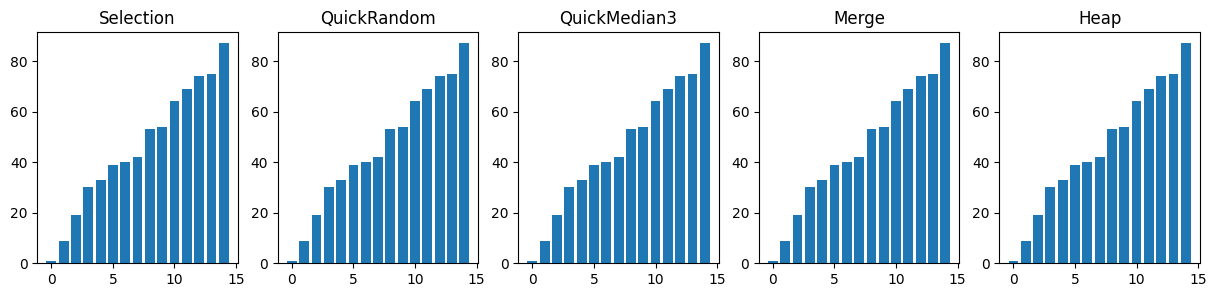

In [4]:
# Problem 2
def is_sorted(a):return all(a[i]<=a[i+1]for i in range(len(a)-1))
cases=[[],[1],[2,1],[5,3,2,8,1],[9,8,7,6,5],[1,2,3,4,5],random.sample(range(100),15)]
print("Correctness check:\n")
for n,f in algos.items():
    print(f"{n:15s}:",all(is_sorted(f(c))for c in cases))

# Visualization 2: Compare correctness visually
sample=[random.randint(0,100)for _ in range(15)]
fig,axes=plt.subplots(1,len(algos),figsize=(15,3))
for i,(n,f) in enumerate(algos.items()):
    axes[i].bar(range(len(sample)),f(sample))
    axes[i].set_title(n)
plt.show()

In [3]:
# Problem 3
def make_data(n,t):
    if t=="random":return [random.randint(0,n*3)for _ in range(n)]
    if t=="sorted":return list(range(n))
    if t=="reversed":return list(range(n,0,-1))
    if t=="few_unique":return [random.choice([1,2,3,4,5])for _ in range(n)]

sizes=[100,500,1000,2000,5000]
types=["random","sorted","reversed","few_unique"]
results=[]
for t in types:
    for n in sizes:
        row={"type":t,"n":n}
        for name,f in algos.items():
            if name=="Selection"and n>2000:
                row[name]=None;continue
            data=make_data(n,t)
            t0=time.perf_counter();f(data);t1=time.perf_counter()
            row[name]=round(t1-t0,5)
        results.append(row)
df=pd.DataFrame(results)
print("\nPerformance sample:\n",df.head())


Performance sample:
      type     n  Selection  QuickRandom  QuickMedian3    Merge     Heap
0  random   100    0.00022      0.00054       0.00014  0.00019  0.00003
1  random   500    0.00573      0.00104       0.00083  0.00103  0.00014
2  random  1000    0.01888      0.00148       0.00125  0.00182  0.00030
3  random  2000    0.07288      0.00310       0.00266  0.00378  0.00050
4  random  5000        NaN      0.00849       0.00724  0.01060  0.00150


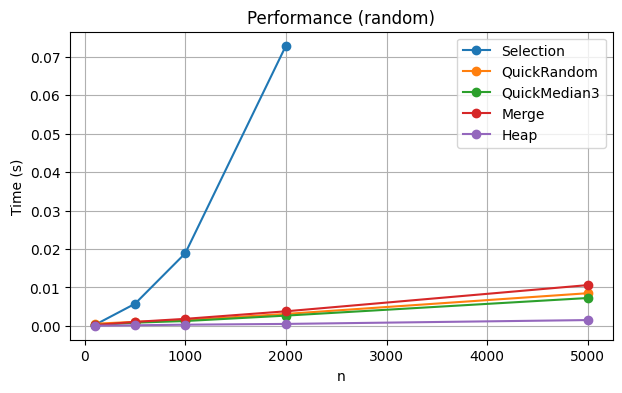

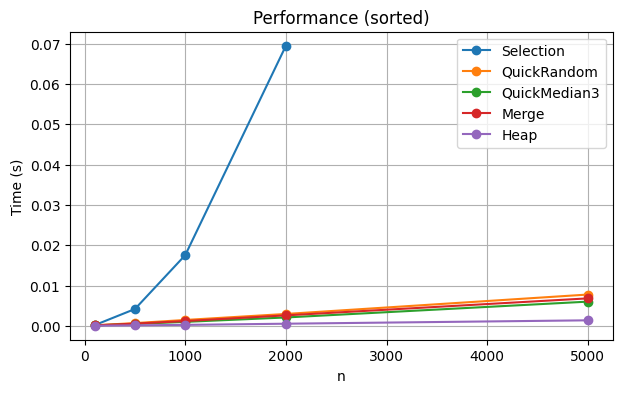

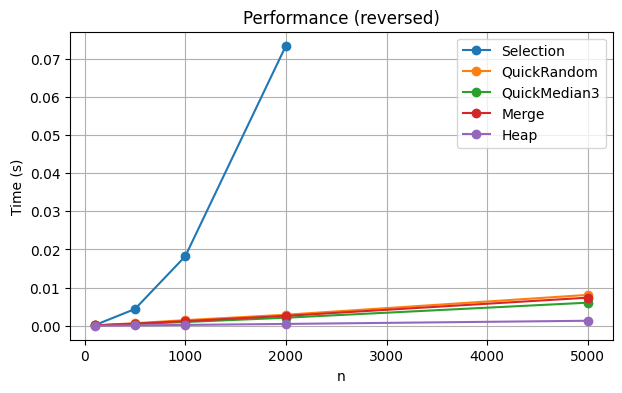

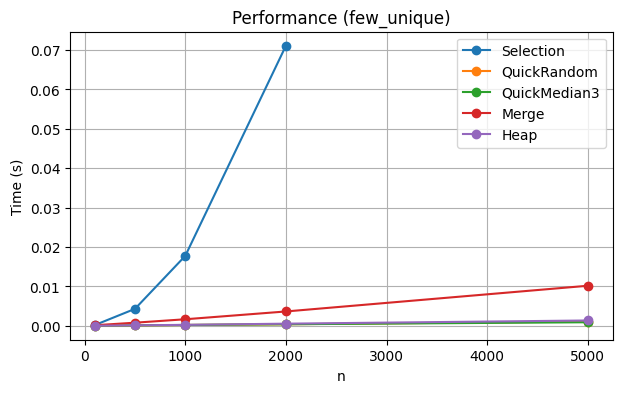

In [5]:
# Visualization 3: time vs n
for t in types:
    s=df[df["type"]==t]
    plt.figure(figsize=(7,4))
    for name in algos.keys():
        plt.plot(s["n"],s[name],marker="o",label=name)
    plt.title(f"Performance ({t})")
    plt.xlabel("n");plt.ylabel("Time (s)")
    plt.legend();plt.grid(True)
    plt.show()